
#Set-up and imports


In [1]:
!nvidia-smi

Thu Apr 22 12:27:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
sys.path.append('/content/gdrive/MyDrive/Colab/arXivClassifier/')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
!pip install -qq transformers

In [4]:
import TrainModels as TM
import RunOnData as RD

#Get data

Create your data-of-choice using DataSelection.py. To avoid uploading the arXiv dataset to google drive, I ran DemoData.py locally and then uploaded the files.




# Train and save models

Skip to the next step if you've already trained models and just want to evaluate.

there are 2400 total samples




Epoch 1/10
----------
Train loss 0.5227683069857044 accuracy 0.7791666666666667
Val   loss 0.2190234608327349 accuracy 0.9416666666666667
saving model

Epoch 2/10
----------
Train loss 0.2862841433034865 accuracy 0.9055555555555556
Val   loss 0.17663522313038507 accuracy 0.95
saving model

Epoch 3/10
----------
Train loss 0.18928989911391572 accuracy 0.9541666666666667
Val   loss 0.2488404265798939 accuracy 0.9416666666666667

Epoch 4/10
----------
Train loss 0.11791595235451867 accuracy 0.9750000000000001
Val   loss 0.20760115119628608 accuracy 0.9583333333333334
saving model

Epoch 5/10
----------
Train loss 0.07853666747514917 accuracy 0.9842592592592593
Val   loss 0.21983871400395097 accuracy 0.9583333333333334

Epoch 6/10
----------
Train loss 0.05343310404903066 accuracy 0.9916666666666667
Val   loss 0.24941015965790334 accuracy 0.9583333333333334

Epoch 7/10
----------
Train loss 0.05443665793926037 accuracy 0.9902777777777778
Val   loss 0.24321872417688914 accuracy 0.95833333

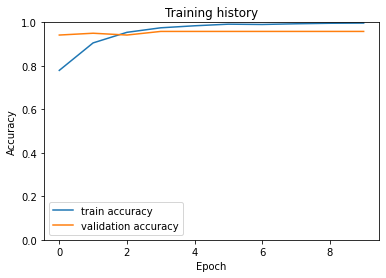

In [5]:
training_set_name = '99_sincat'
data_path = 'gdrive/MyDrive/Colab/arXivClassifier/'
mod_path = '/content/gdrive/MyDrive/Colab/arXivClassifier/' 

cat_dict1, dl_test1 = TM.TrainingRun(training_set_name, data_path, mod_path, epochs=10).data_to_model()

there are 2400 total samples

Epoch 1/10
----------
Train loss 0.8131898470498897 accuracy 0.5824074074074075
Val   loss 0.5429461176196734 accuracy 0.6166666666666667
saving model

Epoch 2/10
----------
Train loss 0.42569938484855274 accuracy 0.8435185185185186
Val   loss 0.37874950282275677 accuracy 0.9083333333333333
saving model

Epoch 3/10
----------
Train loss 0.2695917563030013 accuracy 0.9319444444444445
Val   loss 0.34391502768266946 accuracy 0.9166666666666666
saving model

Epoch 4/10
----------
Train loss 0.2171268545724969 accuracy 0.9467592592592593
Val   loss 0.3420864549698308 accuracy 0.9166666666666666

Epoch 5/10
----------
Train loss 0.1640602454340465 accuracy 0.962962962962963
Val   loss 0.3160831633916435 accuracy 0.9333333333333333
saving model

Epoch 6/10
----------
Train loss 0.12862952995972052 accuracy 0.9726851851851852
Val   loss 0.3291816243242162 accuracy 0.9416666666666667
saving model

Epoch 7/10
----------
Train loss 0.08793059789631688 accuracy 0.9819

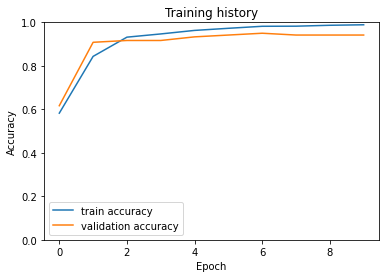

In [6]:
training_set_name = '19_sincat'
data_path = 'gdrive/MyDrive/Colab/arXivClassifier/'
mod_path = '/content/gdrive/MyDrive/Colab/arXivClassifier/' 

cat_dict2, dl_test2 = TM.TrainingRun(training_set_name, data_path, mod_path, epochs=10).data_to_model()

# Look at the results

Here we can see the results for this mini-arXiv classifier that only looks at a few categories over a few years.

In [5]:
data_path = 'gdrive/MyDrive/Colab/arXivClassifier/'
mod_path = '/content/gdrive/MyDrive/Colab/arXivClassifier/' 

test_dataset_names = ['05_sincat', '10_sincat']
model_names = ['99_sincat', '19_sincat']

model_info = [TM.TrainingRun(x, data_path, mod_path, epochs=10).get_model_dict_loader() for x in model_names]

model_dicts = [model_info[0][0], model_info[1][0]]
model_test_dls = [model_info[0][1], model_info[1][1]]

DemoEval = RD.EvaluationCase(test_dataset_names, model_names, model_dicts, model_test_dls, data_path, mod_path)

dataset sizes = [120, 120, 120, 120]


<Figure size 432x288 with 0 Axes>

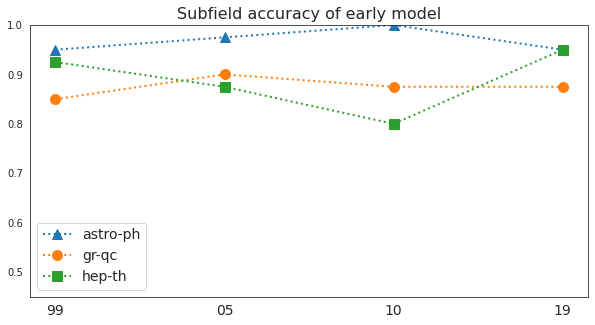

In [6]:
reult1, result2 = DemoEval.get_results_sincat()